<a href="https://colab.research.google.com/github/deltorobarba/finance/blob/main/efficient_frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Portfolio optimization  in financial asset management**

The goal is to create an efficient frontier, which helps in allocating weights to assets in a portfolio to maximize returns for a given level of risk.

The portfolio is optimized for the maximum Sharpe ratio, which balances return against risk. Weights of individual assets are obtained from the optimization.

In [1]:
!pip install PyPortfolioOpt -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.1 MB/s eta 0:00:00


[*********************100%***********************]  5 of 5 completed


Optimized Portfolio Weights: OrderedDict([('AAPL', 0.20476), ('AMZN', 0.0), ('GOOGL', 0.0), ('MSFT', 0.0), ('TSLA', 0.79524)])
Expected annual return: 54.1%
Annual volatility: 61.7%
Sharpe Ratio: 0.84


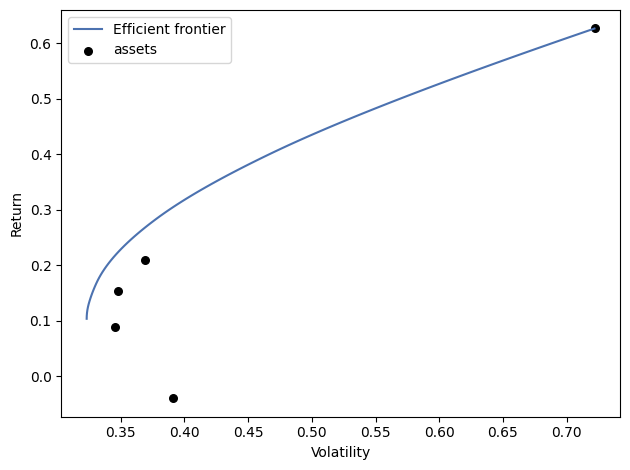

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import EfficientFrontier, plotting

# Download stock price data
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Calculate expected returns and the covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Optimize for the maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

# Clean the weights
cleaned_weights = ef.clean_weights()
print("Optimized Portfolio Weights:", cleaned_weights)

# Get performance
expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance(verbose=True)

# Plot the efficient frontier
ef = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

plt.show()

The covariance matrix using a heatmap gives a sense of how assets in your portfolio are correlated. Covariance Matrix Calculation is done using the risk_models.sample_cov() function, which estimates the covariance matrix based on the stock price returns.

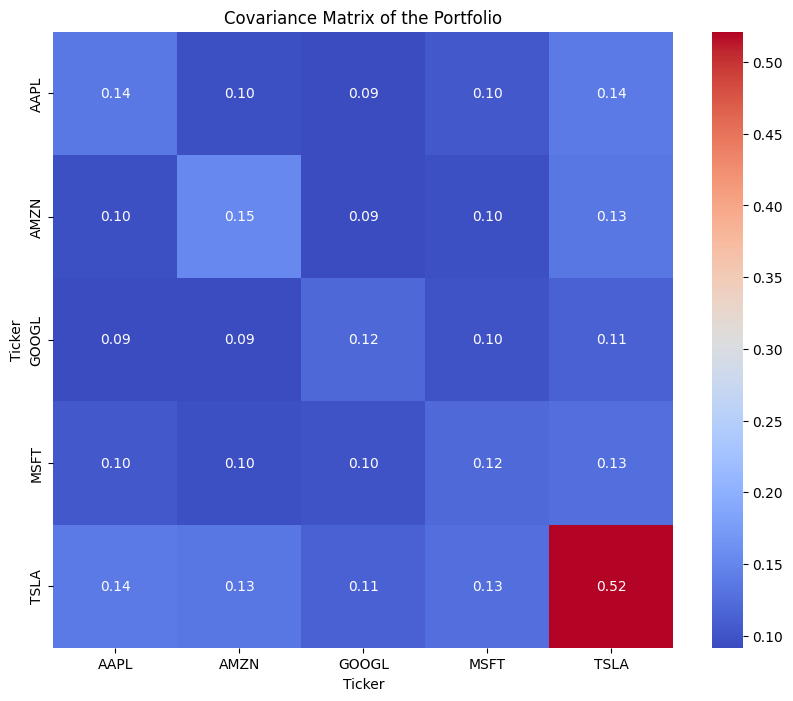

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from pypfopt import risk_models

# Calculate the covariance matrix
S = risk_models.sample_cov(data)

# Plot the heatmap of the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(S, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Covariance Matrix of the Portfolio")
plt.show()
